## <center>Convolution Neural Networks</center>


In this lab, we introduce two datasets, MNIST and CIFAR, then we will talk about how to implement CNN models for these two datasets using tensorflow. The major difference between mnist and cifar is their size. Due to the limit of memory size and time issue, we offer a guide to illustrate typical input pipeline of tensorflow. Let's dive into tensorflow!

In [1]:
import warnings
import os
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import tensorflow as tf
from tensorflow.keras import utils, datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import pickle
import csv
import itertools
from collections import defaultdict
import time
import pandas as pd
import math
from tqdm import tqdm
import dill

2023-11-08 15:16:48.823873: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 15:16:48.823897: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 15:16:48.823924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 1 Logical GPUs


In [3]:
import urllib.request
if not os.path.exists("lab11_1_lib.py"):
    urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/11-1_CNN/lab11_1_lib.py", "lab11_1_lib.py")

from lab11_1_lib import draw_timeline

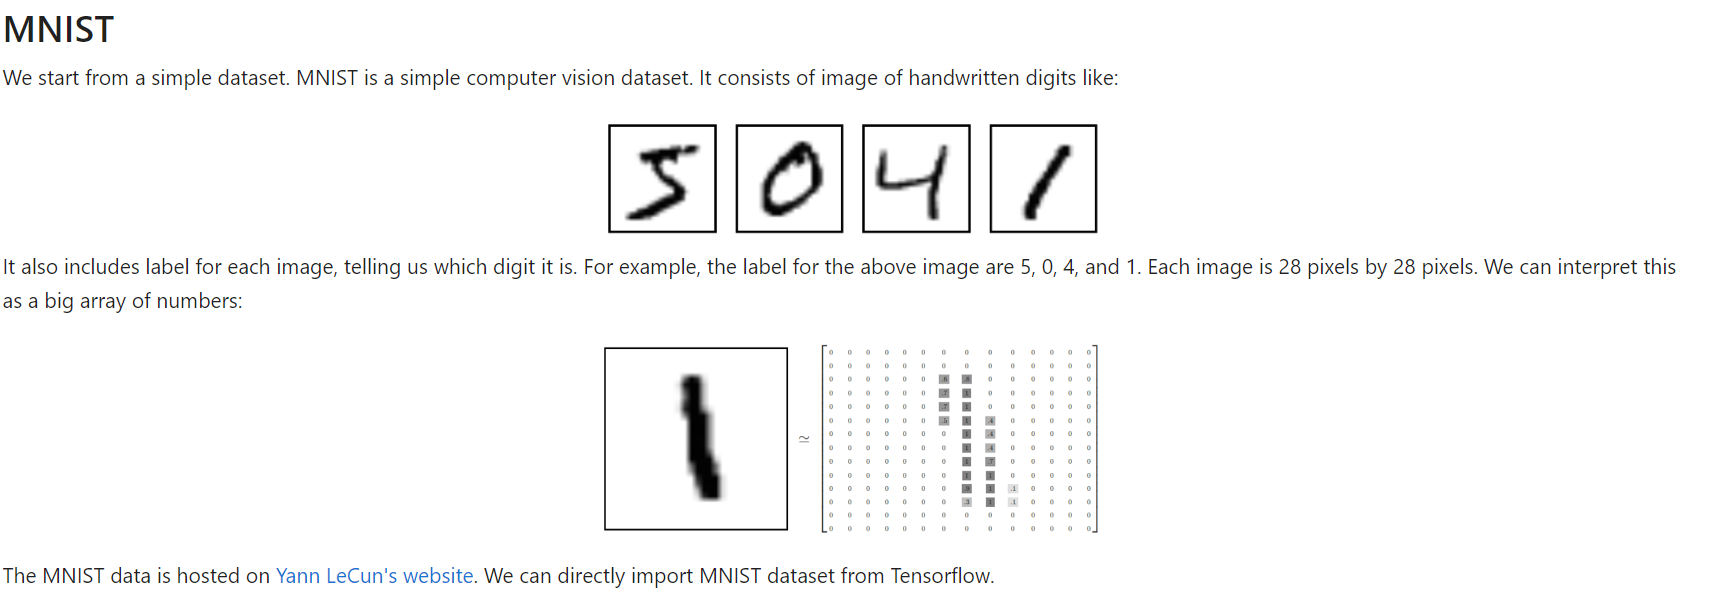

In [4]:
# Download and prepare the MNIST dataset
(train_image, train_label), (test_image, test_label) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_image, test_image = train_image / 255.0, test_image / 255.0
print('shape of train_image:', train_image.shape)
print('shape of train_label:', train_label.shape)

shape of train_image: (60000, 28, 28)
shape of train_label: (60000,)


### Softmax Regression on MNIST

Before jumping to Convolutional Neural Network model, we're going to start with a very simple model with a single layer and softmax regression.

We know that every image in MNIST is a handwritten digit between zero and nine. So there are only ten possible digits that a given image can be. We want to give the probability of the input image for being each digit. That is, input an image, the model outputs a ten-dimension vector.

This is a classic case where a softmax regression is a natural, simple model. If you want to assign probabilities to an object being one of several different things, softmax is the thing to do.

In [5]:
# flating the training data for dense layers
train_image_1 = train_image.reshape((60000, -1))
test_image_1 = test_image.reshape((10000, -1))
print(train_image_1.shape)
print(test_image_1.shape)

(60000, 784)
(10000, 784)


你提供的代码片段是使用Keras创建神经网络模型的示例，Keras通常与TensorFlow一起用于深度学习任务。下面是代码片段的解释：

1. `models.Sequential()`: 这一行创建了一个Sequential模型。在Keras中，Sequential模型是一种线性层叠的模型，你可以依次添加一层。

2. `model_1.add(layers.Dense(10, activation='softmax', input_shape=(784,)))`: 这一行向`model_1`中添加了一个Dense（全连接）层。让我们分解一下参数：
   - `10`: 这是Dense层中的神经元数目。表示这一层有10个输出单元。
   - `activation='softmax'`: 这一层使用的激活函数是softmax激活函数。Softmax通常用于神经网络的输出层，用于多类别分类问题。它将输出值压缩成多个类别的概率分布。
   - `input_shape=(784,)`: 这指定了模型期望的输入数据形状。在这种情况下，它表示每个输入样本应具有形状(784,)。这对于诸如图像分类的任务常见，其中输入数据可能是展平的28x28像素图像（784个值）。

3. `model_1.summary()`: 这一行打印模型的体系结构摘要，显示每个层的详细信息，参数数量以及每个层的输出形状。

你提供的代码创建了一个简单的前馈神经网络，只包含一个Dense层，适用于特定类型的分类任务，有10个输出类别。输入数据预期的形状是(784,)，这表明它可能用于手写数字分类（例如，MNIST数据集）。输出层中的softmax激活函数适用于多类别分类问题。

请注意，这只是神经网络的初始层，通常情况下，你需要添加更多层，包括隐藏层，以创建适用于特定任务的更复杂的模型。

In [6]:
model_1 = models.Sequential()
model_1.add(layers.Dense(10, activation='softmax',input_shape=(784,)))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# compile the model and train it for 5 epochs
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(train_image_1, train_label, epochs=5)

Epoch 1/5


: 